<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [17]:
%matplotlib inline
import sys
sys.path.append('../data_preparation')
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.externals import joblib
from sm_factor_analysis.factor_analysis import Factor

In [11]:
PERCEIVED_CONTROL = ['LOC_LIFES_COURSE', 'LOC_ACHIEVED_DESERVE', 'LOC_LUCK',
                     'LOC_OTHERS', 'LOC_DOUBT', 'LOC_POSSIBILITIES',
                     'LOC_LITTLE_CONTROL']

In [12]:
loc_container = joblib.load('../../bld/out/data/loc_container.pkl')

In [15]:
print(loc_container['cronbachs_alpha_ten'])
print(loc_container['cronbachs_alpha_seven'])
print(loc_container['cronbachs_alpha_seven'] - loc_container['cronbachs_alpha_ten'])

0.607754531488
0.698386707376
0.090632175888


In [4]:
df = loc_container['data']
data = df[PERCEIVED_CONTROL]

In [5]:
fa = Factor(data, n_factor=2, method='pa')

In [6]:
fitted = fa.fit()

In [21]:
fitted.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Factor analysis results
=========================================================================================================
                                Eigenvalues                                                              
---------------------------------------------------------------------------------------------------------
 LOC_LIFES_COURSE LOC_ACHIEVED_DESERVE LOC_LUCK LOC_OTHERS LOC_DOUBT LOC_POSSIBILITIES LOC_LITTLE_CONTROL
---------------------------------------------------------------------------------------------------------
           1.8564               0.2385   0.0870     0.0367    0.0121           -0.0415            -0.0942
---------------------------------------------------------------------------------------------------------
                                                                                                         
---------------------------------------------------------------------------------------------------------
                                Communality                                                              
---------------------------------------------------------------------------------------------------------
 LOC_LIFES_COURSE LOC_ACHIEVED_DESERVE LOC_LUCK LOC_OTHERS LOC_DOUBT LOC_POSSIBILITIES LOC_LITTLE_CONTROL
---------------------------------------------------------------------------------------------------------
           0.2073               0.2834   0.2733     0.3977    0.2589            0.1828             0.4915
---------------------------------------------------------------------------------------------------------
                                                                                                         
---------------------------------------------------------------------------------------------------------
                             Pre-rotated loadings                                                        
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                        factor 0                                                                    factor 1
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
LOC_LIFES_COURSE                                                                          0.3718                                                                      0.2629
LOC_ACHIEVED_DESERVE                                                                      0.5098                                                                     -0.1530
LOC_LUCK                                                                                  0.4544                                                                     -0.2585
LOC_OTHERS                                                                                0.6152                                                                      0.1386
LOC_DOUBT                                                                                 0.5057                                                                     -0.0566
LOC_POSSIBILITIES                                                                         0.3898                                                                     -0.1759
LOC_LITTLE_CONTROL                                                                        0.6824                                                                      0.1607
---------------------------------------------------------------------------------------------------------
                                                                                                         
------------------------------------

In [7]:
fitted.get_loadings_frame()

,factor 0,factor 1
LOC_LITTLE_CONTROL,0.682371,0.160703
LOC_OTHERS,0.615221,0.138551
LOC_ACHIEVED_DESERVE,0.509833,-0.153044
LOC_DOUBT,0.505665,-0.056637
LOC_LUCK,0.454398,-0.258454
LOC_POSSIBILITIES,0.389757,-0.175864
LOC_LIFES_COURSE,0.371768,0.262941


In [8]:
fitted.rotate(method='varimax')
fitted.get_loadings_frame()

,factor 0,factor 1
LOC_LITTLE_CONTROL,0.663938,-0.225039
LOC_OTHERS,0.595245,-0.208269
LOC_LIFES_COURSE,0.454603,0.0261706
LOC_DOUBT,0.398948,-0.315825
LOC_LUCK,0.248585,-0.459872
LOC_ACHIEVED_DESERVE,0.351431,-0.399811
LOC_POSSIBILITIES,0.237489,-0.355581


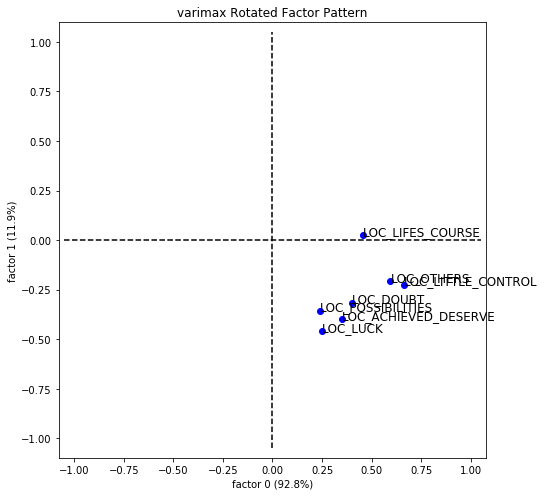

In [18]:
fitted.plot_loadings()

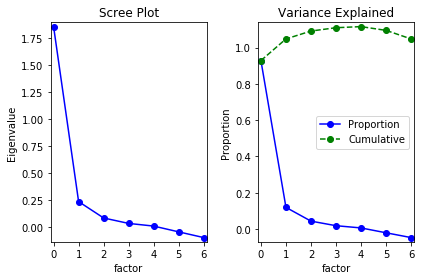

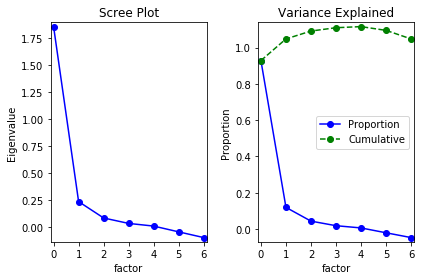

In [19]:
fitted.plot_scree()